In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [6]:
df = pd.read_csv(r"C:\Users\Windows\Downloads\supermarket_sales - Sheet1.csv")
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.shape


(1000, 17)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
df.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## Dataset Overview
- The dataset contains 1000 rows and 17 columns
- Data includes sales, product, customer, and payment details
- No missing values were found in the dataset


In [11]:
df.isna().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Business Questions
1. Which branch has the highest number of transactions?
2. Which product line generates the highest revenue?
3. Which payment method is most commonly used?
4. Does gender affect spending?


In [12]:
df['Branch'].value_counts()


Branch
A    340
B    332
C    328
Name: count, dtype: int64

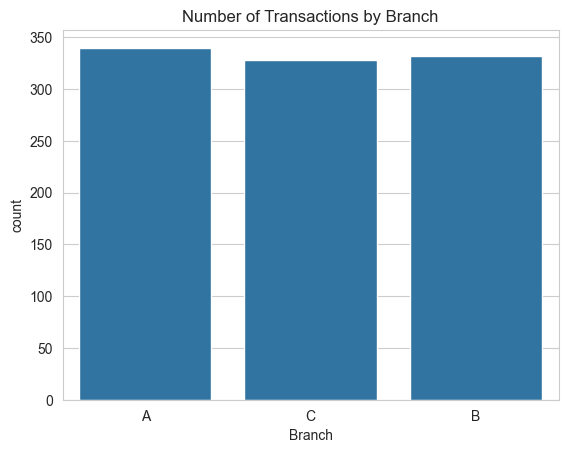

In [13]:
sns.countplot(x='Branch', data=df)
plt.title("Number of Transactions by Branch")
plt.show()


Branch A has the highest number of transactions compared to other branches.


In [14]:
df.groupby('Product line')['Total'].sum().sort_values(ascending=False)


Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

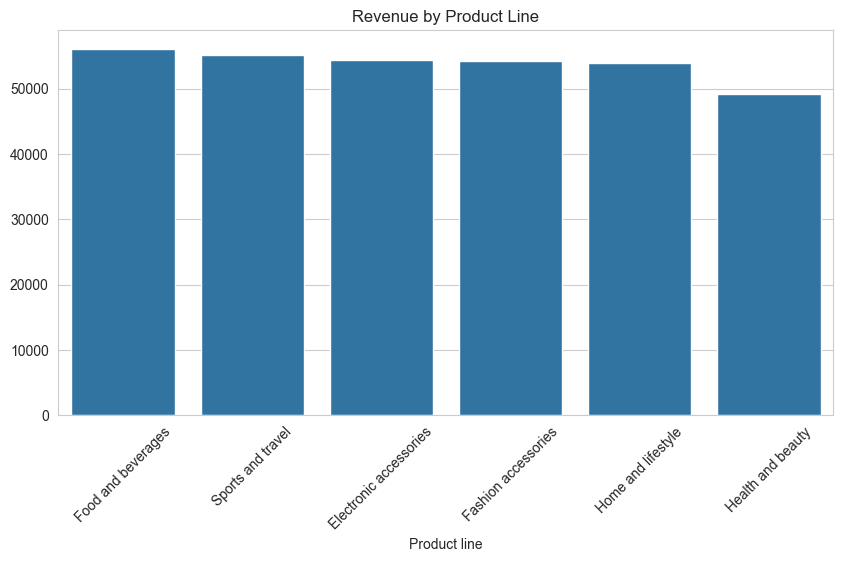

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=df.groupby('Product line')['Total'].sum().sort_values(ascending=False).index,
    y=df.groupby('Product line')['Total'].sum().sort_values(ascending=False).values
)
plt.xticks(rotation=45)
plt.title("Revenue by Product Line")
plt.show()


Electronic accessories and food & beverages contribute significantly to total revenue.


In [16]:
df['Payment'].value_counts()


Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

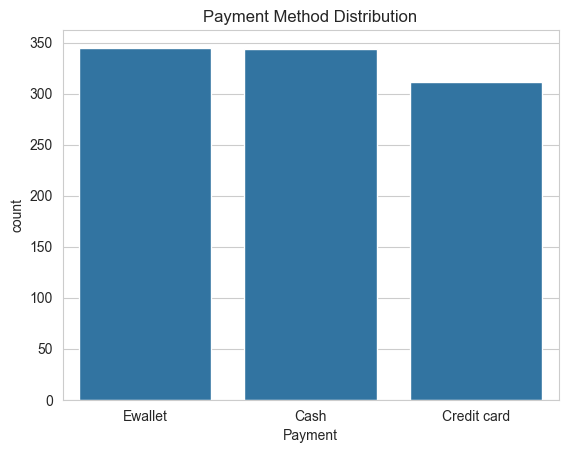

In [17]:
sns.countplot(x='Payment', data=df)
plt.title("Payment Method Distribution")
plt.show()


E-wallet is the most commonly used payment method, followed by cash and credit card.


In [18]:
df.groupby('Gender')['Total'].mean()


Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

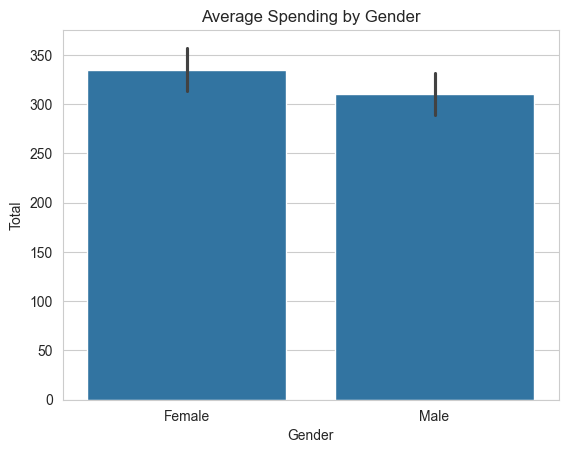

In [19]:
sns.barplot(x='Gender', y='Total', data=df)
plt.title("Average Spending by Gender")
plt.show()


Female customers have slightly higher average spending than male customers.


## Key Insights
- Branch A records the highest number of transactions
- Certain product lines generate higher revenue consistently
- E-wallet is the most preferred payment method
- Average spending varies slightly by gender
